# Augmentorを用いたデータ拡張
* [参考]
    * https://github.com/mdbloice/Augmentor
    * http://augmentor.readthedocs.io/en/master/code.html#Augmentor.Pipeline.Pipeline.random_erasing

Google Colab. 上での実行です
「ファイルを選択」から、1_data/augmentor/original/bridge.jpgを選択し、アップロードしてください


Saving bridge.jpg to bridge (1).jpg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


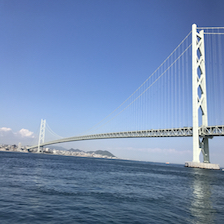

In [2]:
from PIL import Image
import shutil
import os

try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、1_data/augmentor/original/bridge.jpgを選択し、アップロードしてください')
    print('===========')
    files.upload()
    %mkdir -p ../1_data/augmentor/original
    !mv *.jpg ../1_data/augmentor/original
    !pip install Augmentor
except:
    print('ローカル環境での実行です')


import Augmentor

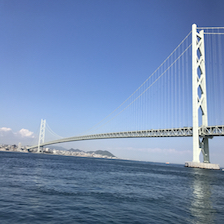

In [ ]:
# 元画像
img_ = Image.open("../1_data/augmentor/original/bridge.jpg")
img_

## データ拡張の実行

### [演習]
* 以下を実行し、データ拡張を行いましょう。
* 拡張後の画像を開いてどのように変形されたかを確認しましょう。
* [注意] セルを何度も実行すると、前回の計算が終わっていなためにエラーがでることがあります。

In [3]:
for i in range(6):
    
    dpath_from = "../1_data/augmentor/original/%s"%i
    dpath_to = "../1_data/augmentor/%s"%i
    for dpath in [dpath_from, dpath_to]:
        if os.path.exists(dpath):
            """
            前回の結果が残っていたら消す
            """
            shutil.rmtree(dpath)
            
        
    # オブジェクトの生成
    p = Augmentor.Pipeline("../1_data/augmentor/original/")

    if i==0:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    elif i==1:
        p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    elif i==2:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    elif i==3:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
        p.flip_left_right(probability=0.5)
        p.flip_top_bottom(probability=0.5)       
    elif i==4:
        p.random_erasing(probability=0.7, rectangle_area=0.5)
    elif i==5:
        p.crop_random(probability=0.7, percentage_area=0.6)
        
    # 実行
    p.sample(10)
    
    # ディレクトリの名前を変更し移動
    os.rename("../1_data/augmentor/original/output", dpath_from)
    shutil.move(dpath_from, dpath_to)

Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDFB66F75D0>: 100%|██████████| 10/10 [00:00<00:00, 58.90 Samples/s]


Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDFB6705410>: 100%|██████████| 10/10 [00:00<00:00, 88.70 Samples/s]


Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDFBDE64B50>: 100%|██████████| 10/10 [00:00<00:00, 64.30 Samples/s]


Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FDFB3E9FA10>: 100%|██████████| 10/10 [00:00<00:00, 69.59 Samples/s]


Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FDFB3EC19D0>: 100%|██████████| 10/10 [00:00<00:00, 77.69 Samples/s]


Initialised with 2 image(s) found.
Output directory set to ../1_data/augmentor/original/output.

Processing <PIL.Image.Image image mode=RGB size=134x134 at 0x7FDFB3EC12D0>: 100%|██████████| 10/10 [00:00<00:00, 108.53 Samples/s]


### [演習]
* https://github.com/mdbloice/Augmentor を参考にしながら、拡張の条件をいろいろ変更してみましょう